In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd
import joblib

In [9]:
model_1=joblib.load('logistic_regression_model.pkl')
model_2=joblib.load('KNN.pkl')
model_3=joblib.load('Perceptron.pkl')

In [10]:
data = pd.read_csv('data_clean.csv')
y = data.diagnosis.values
x_data = data.drop(['diagnosis', "Unnamed: 0"], axis = 1)

# Chuẩn hóa 
#x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))
x=x_data

In [11]:
from sklearn.model_selection import train_test_split

# Assuming x and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [12]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
204,12.47,18.60,81.09,481.9,0.09965,0.10580,0.080050,0.038210,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.23780,0.267100,0.10150,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.108000,0.079510,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.23360,0.268700,0.17890,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.12230,0.146600,0.080870,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.23940,0.379100,0.15140,0.2837,0.08019
431,12.40,17.68,81.47,467.8,0.10540,0.13160,0.077410,0.027990,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.26290,0.240300,0.07370,0.2556,0.09359
540,11.54,14.44,74.65,402.9,0.09984,0.11200,0.067370,0.025940,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.21180,0.179700,0.06918,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,11.25,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,0.1773,0.06081,...,12.76,22.06,82.08,492.7,0.1166,0.09794,0.005518,0.01667,0.2815,0.07418
86,14.48,21.46,94.25,648.2,0.09444,0.09947,0.120400,0.049380,0.2075,0.05636,...,16.21,29.25,108.40,808.9,0.1306,0.19760,0.334900,0.12250,0.3020,0.06846
250,20.94,23.56,138.90,1364.0,0.10070,0.16060,0.271200,0.131000,0.2205,0.05898,...,25.58,27.00,165.30,2010.0,0.1211,0.31720,0.699100,0.21050,0.3126,0.07849
274,17.93,24.48,115.20,998.9,0.08855,0.07027,0.056990,0.047440,0.1538,0.05510,...,20.92,34.69,135.10,1320.0,0.1315,0.18060,0.208000,0.11360,0.2504,0.07948


In [13]:
X_test.concave_points_worst

204    0.10150
70     0.17890
131    0.15140
431    0.07370
540    0.06918
        ...   
333    0.01667
86     0.12250
250    0.21050
274    0.11360
257    0.22290
Name: concave_points_worst, Length: 86, dtype: float64

In [14]:
y_pred1 = model_1.predict(X_test)
y_pred2 = model_2.predict(X_test)
y_pred3 = model_3.predict(X_test)

In [15]:
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [16]:
#model 1
cross_val1 = cross_val_score(model_1, x, y, cv = 10, scoring = 'accuracy') 
accuracy1 = accuracy_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
f1_1 = f1_score(y_test, y_pred1)
auc1 = roc_auc_score(y_test, y_pred1)
#model 2
cross_val2 = cross_val_score(model_2, x, y, cv = 10, scoring = 'accuracy')
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2)
auc2 = roc_auc_score(y_test, y_pred2)
#model 3
cross_val3 = cross_val_score(model_3, x, y, cv = 10, scoring = 'accuracy')
accuracy3 = accuracy_score(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3)
recall3 = recall_score(y_test, y_pred3)
f1_3 = f1_score(y_test, y_pred3)
auc3 = roc_auc_score(y_test, y_pred3)

c:\Users\dongh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dongh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [17]:
# lập bảng so sánh
data1 = {
    'Model': ['Logistic_regression','KNN','PLA'],
    "cross_val":[cross_val1.mean(), cross_val2.mean(), cross_val3.mean()],
    'Accuracy': [accuracy1, accuracy2, accuracy3],
    'Precision': [precision1, precision2, precision3],
    'Recall': [recall1, recall2, recall3],
    'F1 Score': [f1_1, f1_2, f1_3],
    'AUC': [auc1, auc2, auc3]
}

df = pd.DataFrame(data1)
df

,Model,cross_val,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic_regression,0.950815,0.372093,0.372093,1.0,0.542373,0.5
1,KNN,0.931516,0.372093,0.372093,1.0,0.542373,0.5
2,PLA,0.868264,0.372093,0.372093,1.0,0.542373,0.5


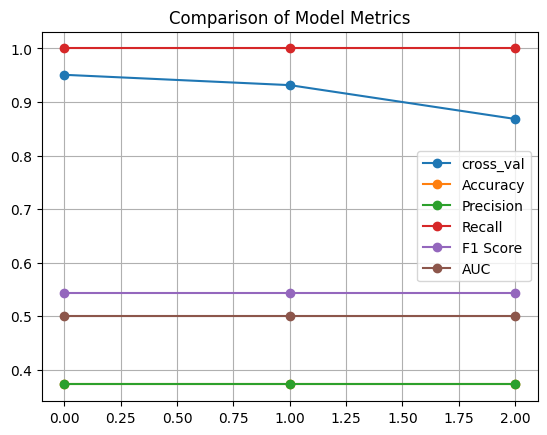

In [18]:
import matplotlib.pyplot as plt
df.plot(kind='line', marker='o')
plt.title('Comparison of Model Metrics')
plt.grid(True)
plt.show()